Если признак один, то такая линейная регрессия называется парной. Она описывает связь признака 𝑥 с результирующим признаком 𝑦.
𝑦 = 𝑎 + 𝑏𝑥

1. Определяемся с моделью  (ŷ = β_0 + β_1 ∗ 𝑥)
2. Находим коэффициенты β для уравнения линейной регрессии
3. Подставляем в это уравнение значения признака 𝑥 и рассчитываем оценочные значения 𝑦

Метод наименьших квадратов

(y_1 - ŷ_1)^2 + ... (y_4 - ŷ_4)+ ^2 = 𝑚𝑖𝑛
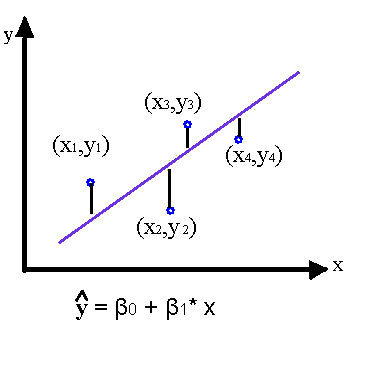

Условия применимости
1. Наличие линейной зависимости между независимой переменной 𝑥 и зависимой 𝑦 (проверяется графически или с помощью корреляционного анализа)
2. Независимость остатков
3. Для любого значения 𝑥 значение зависимой переменной 𝑦 распределено нормально
4. Гомоскедастичность

##### 1 Наличие линейной зависимости между независимой переменной 𝑥 и зависимой 𝑦 

Проверка условия: график

Как решить задачу нелинейности?

Нелинейная  трансформация 𝑥 или/и 𝑦 : 
* логарифм,
* квадратный корень
* умножение на обратное число     

##### 2 Независимость остатков

Если точки на графике остатков разбросаны случайно вокруг горизонтальной линии, то данные подходят для модели линейной регрессии.

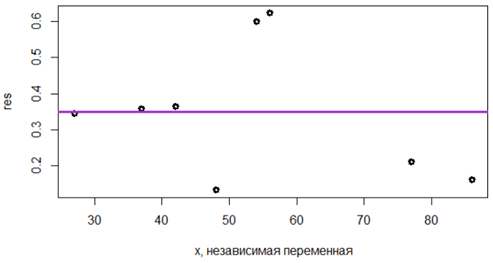

In [31]:
# 3 Нормальное распределение остатков
# Распределение остатков следует нормальному распределению.
# Методы проверки этого условия: QQ-plot, тест Шапиро-Уилка

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

s = np.array([27, 37, 42, 48, 57, 56, 77, 80])
p = np.array([1.2, 1.6, 1.8, 1.8, 2.5, 2.6, 3, 3.3])

# resid = p-y_pred
# stats.shapiro(resid)

##### 4 Гомоскедастичность

Под этим свойством понимается постоянство дисперсии при всех значениях 𝑥. Т.е. стандартное отклонение σ одинаково при всех значениях 𝑥, если разброс остатков неравномерный , то говорят о присутствии гетероскедастичности.

Проверить на наличие гетероскедастичности
можно с помощью графика. 

Решить эту проблему:
* log- трансформация 𝑦 
* переопределить зависимую переменную

Примеры гетероскедастичности
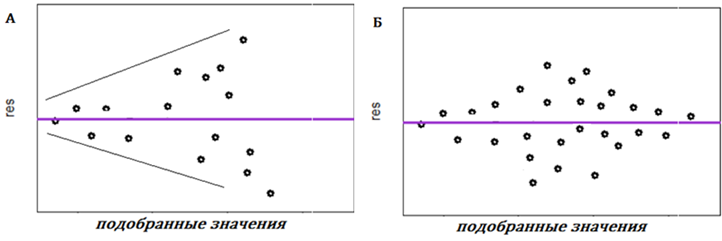

Трансформация данных

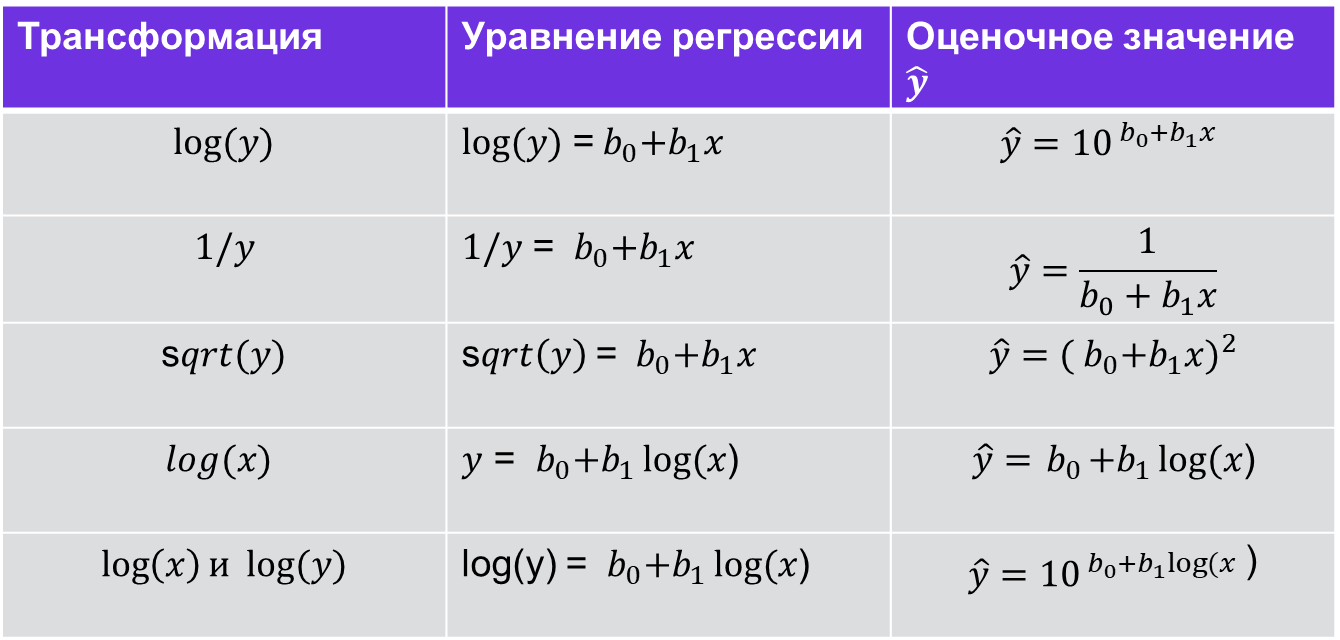

3 метода построения линейной регрессии
* Математические формулы
* Матричный метод
* Метод градиентного спуска

In [11]:
# Расчет коэффициентов по формулам
# по площади s (является признаком) предсказываем цену 

n = len(p) # = len(s) = 8

# 1-й способ
b1 = (n*np.sum(p*s) - np.sum(s) * np.sum(p)) / (n * np.sum(s**2) - np.sum(s)**2)
print(b1) # 0.03874584717607981

# 2-й способ
b1 = (np.mean(s*p) - np.mean(s) * np.mean(p)) / (np.mean(s**2) - np.mean(s)**2)
print(b1) # 0.03874584717607981

b0 = np.mean(p) - b1*np.mean(s)
print(b0) # 0.17147009966776983

y_pred = 0.1714701 + 0.03874585 * s
print(y_pred) # (координаты точек линейной регрессии (s, y_pred))

0.03874584717607981
0.03874584717607981
0.17147009966776983
[1.21760805 1.60506655 1.7987958  2.0312709  2.37998355 2.3412377
 3.15490055 3.2711381 ]


Функция потерь
Функция потерь 𝑚𝑠𝑒 - мера измерения ошибок, которые функция делает на нашем наборе данных

𝑚𝑠𝑒 = (∑(𝑦 − 𝑦_𝑝𝑟𝑒𝑑)^2) / 𝑛
𝑛 – число измерений

In [14]:
mse = ((p - y_pred)**2).sum() / n
print(mse)

0.020001557308994982


In [19]:
# Матричный метод
# ŷ = β_0 + β_1 ∗ 𝑥
# Y = X * B
# 𝐵^ = (𝑋^𝑇 ∗ 𝑋)^(−1) ∗ 𝑋^𝑇 ∗ 𝑌

x = s.reshape((8,1)) # вектор столбец из значений площади
print(x)

y = p.reshape((8,1)) # вектор столбец из значений стоимости
print(y)

# np.ones - создаем столбец из 8 единиц, т.к. имеется интерсепт
# np.hstack - соединение по горизонтали столбца из 1-ц и столбеца x
X = np.hstack([np.ones((8,1)), x]) 
print(X)

# np.dot(X.T,X) - транспонированная матрица Х умножается на матрицу Х
# np.linalg.inv(np.dot(X.T,X) - обратная матрица
# np.dot(np.linalg.inv(np.dot(X.T,X)), X.T @ y) - обратную матрицу умножаем на произведение X.T и y
# @ = *
B = np.dot(np.linalg.inv(np.dot(X.T,X)), X.T @ y)
print(B) # значения b0 и b1

[[27]
 [37]
 [42]
 [48]
 [57]
 [56]
 [77]
 [80]]
[[1.2]
 [1.6]
 [1.8]
 [1.8]
 [2.5]
 [2.6]
 [3. ]
 [3.3]]
[[ 1. 27.]
 [ 1. 37.]
 [ 1. 42.]
 [ 1. 48.]
 [ 1. 57.]
 [ 1. 56.]
 [ 1. 77.]
 [ 1. 80.]]
[[0.1714701 ]
 [0.03874585]]


In [23]:
# Расчет коэффициентов методом градиентного спуска для ŷ = 𝜷_𝟏 * 𝒙
x = np.array([27, 37, 42, 48, 57, 56, 77, 80])
y = np.array([1.2, 1.6, 1.8, 1.8, 2.5, 2.6, 3, 3.3])

def mse_(B1, y=y, x=x, n=8):
    return np.sum((B1*x - y)**2)/n

alfa = 1e-6

#mse = 1/n * np.sum((B1*x - y)**2)/n
#mse = 2/n * np.sum((B1*X - y)*X) производная среднеквадратичной оценки по коэффициенту

B1 = 0.1
n = 8

for i in range(10):
    B1 -= alfa * (2/n) * np.sum((B1*x - y)*x)
    print('B1 = {}'.format(B1))
print()

for i in range(3000):
    B1 -= alfa * (2/n) * np.sum((B1*x - y)*x)
    if i % 500 == 0:
        print('Iteration = {i}, B1 = {B1}, mse = {mse}'.format(i=i, B1=B1, mse=mse_(B1)))
    
# проверка mse
print(mse_(0.041668))

B1 = 0.09963717500000001
B1 = 0.0992766067715
B1 = 0.09891828127738128
B1 = 0.09856218456783597
B1 = 0.09820830277982404
B1 = 0.09785662213653352
B1 = 0.09750712894684428
B1 = 0.09715980960479491
B1 = 0.09681465058905309
B1 = 0.09647163846238918

Iteration = 0, B1 = 0.09613075987115312, mse = 9.247702819884381
Iteration = 500, B1 = 0.04407361917387843, mse = 0.04084470164149809
Iteration = 1000, B1 = 0.041774262033161175, mse = 0.022882329326759373
Iteration = 1500, B1 = 0.041672699727015455, mse = 0.022847285143930744
Iteration = 2000, B1 = 0.04166821373314919, mse = 0.022847216773521282
Iteration = 2500, B1 = 0.041668015587382985, mse = 0.022847216640132135
0.022847216640000008


In [40]:
# Функции в Python для построения линейной регрессии

model = LinearRegression() #задаем модель линейной регрессии

# создаем массив s с двумерным атрибутом reshape(-1, 1)
s = s.reshape(-1, 1)
print(s)

regres = model.fit(s, p) # подбираем коэффициенты
print(regres.intercept_)

# Функция predict()
y_pred = model.predict(s) # подставим площадь в модель и посчитаем предиктовые значения цены квартиры
print(y_pred)

df = pd.DataFrame({'реальные': p, 'предсказанные': y_pred})
print(df)

[[27]
 [37]
 [42]
 [48]
 [57]
 [56]
 [77]
 [80]]
0.1714700996677747
[1.21760797 1.60506645 1.79879568 2.03127076 2.37998339 2.34123754
 3.15490033 3.27113787]
   реальные  предсказанные
0       1.2       1.217608
1       1.6       1.605066
2       1.8       1.798796
3       1.8       2.031271
4       2.5       2.379983
5       2.6       2.341238
6       3.0       3.154900
7       3.3       3.271138


Коэффициент детерминации показывает, какую долю изменчивости 𝑦 описала подобранная математическая модель. Коэффициент детерминации равен квадрату коэффициента корреляции и обозначается 𝑅^2= 𝑟^2.

In [41]:
# s = np.array([27, 37, 42, 48, 57, 56, 77, 80])
# p = np.array([1.2, 1.6, 1.8, 1.8, 2.5, 2.6, 3, 3.3])
# r = np.corrcoef(s, p) [1,0]
# print(r)
# print(r**2)

# или из математической модели
print(regres.score(s,p))

0.957612593782315


Оценка значимости математической модели. Критерий Фишера
F-критерий Фишера позволяет оценить значимость модели линейной   регрессии Установим уровень значимости  α = 0,05.
Fр = MSf/ MSo
Msf = SSf / df1 (фактическая сумма квадратных отклонений н а одну степень свободы) 
Mso = SSo / df2 (остаточная сумма квадратных отклонений н а одну степень свободы)
df1 - степени свободы числителя df1=p-1, p - число параметров (площадь и цена, т.е. 2)
df2 - степень свободы знаменателя df2=n-p, n-число парных измерений (n=8)
SSf - сумма квадратных отклонений фактическая
SSo - сумма квадратных отклонений остаточная

In [47]:
print(stats.f.ppf(1-0.05, 1, 6)) # табличное значение критерия Фишера

df1 = 2-1
df2 = 8-2

SSf = np.sum((y_pred-np.mean(p))**2)
print(SSf)

SSo = np.sum((p-y_pred)**2)
print(SSo)

Msf = SSf/ df1
print(Msf)

Mso = SSo/ df2
print(Mso)

Fp = Msf / Mso
print(Fp) # 135.55 < 5.987 
# => попадаем в область принятия альтернативной гипотезы, 
# т.е. модель является статистически значимой, коэффициенты отличны от нуля

5.987377607273699
3.614987541528235
0.16001245847176088
3.614987541528235
0.02666874307862681
135.55147803067638


 Оценка значимости отдельных коэффициентов. Критерий Стьюдента
 t-критерий Стьюдетнта позволяет оценить значимость отдельных коэффициентов  модели линейной   регрессии

In [49]:
print(stats.t.ppf(1-0.025, 6)) # 2.447 табличное значение для alfa=5% и двустороннего теста

#sb, s0 - стандартные ошибки коэффициентов
sb = np.sqrt(Mso / np.sum((s - np.mean(s))**2))
print(sb)

s0 = np.sqrt((Mso * np.sum(s**2)) / (n*sum((s - np.mean(s))**2)))
print(s0)

tb = b1 / sb # критерий Стьюдента для коэф-та b1
print(tb) # 11.642 не попадает в интервал -2.447:2.447 в область принятия нулевой гипотезы
# b1 не будет являться статистически значимым

t0 = b0 / s0 # критерий Стьюдента для коэф-та b0
print(t0) # 0.923 попадает в интервал -2.447:2.447 в область принятия нулевой гипотезы
# b0 (интерсепт) не будет являться статистически значимым

2.4469118487916806
0.0033279211856704766
[0.18558943]
11.642657687601963
[0.92392171]


Логистическая регрессия применяется, когда 𝑦 является бинарной переменной (0 или 1). Т.е. с помощью этого метода мы можем решить задачу бинарной классификации.
𝑠𝑖𝑔𝑚𝑜𝑖𝑑 = 1 / (1 + 𝑒^(−𝑚𝑜𝑑𝑙))

Постройте графики для приведенных наборов данных. Найдите коэффициенты для линии 
регрессии и коэффициенты детерминации. Что вы замечаете? Нанесите на график модель 
линейной регрессии.
X1= np.array([30,30,40, 40)]
Y1= np.array([37, 47, 50, 60)] 
x2= np.array([30,30,40, 40, 20, 20, 50, 50]) 
y2= np.array([37, 47, 50, 60, 25, 35, 62, 72]) 
X3 = np.array([30,30,40, 40, 20, 20, 50, 50, 10, 10, 60, 60]) 
Y3 = np.array([37, 47, 50, 60, 25, 35, 62, 72, 13, 23, 74, 84]) 

Коэффициент детерминации r: 0.6282527881040891

Расчет коэффициентов по формулам для ŷ = β_0 + β_1 ∗ 𝑥
Коэффициент b1: 1.3
Коэффициент b0: 3.0
Значения y_pred: [42. 42. 55. 55.]

Матричный метод для ŷ = β_0 + β_1 ∗ 𝑥
Коэффициенты b0: 3.0, b1: 1.3

Расчет коэффициентов методом градиентного спуска для ŷ = β_1 ∗ 𝑥
Коэффициент b1: 1.4

Расчет коэффициентов методом градиентного спуска для β_0 + β_1 ∗ 𝑥
Коэффициент b0: 0.14, b1: 1.38


<function matplotlib.pyplot.show(close=None, block=None)>

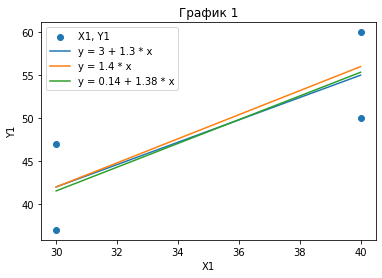

In [104]:
X1 = np.array([30, 30, 40, 40])
Y1 = np.array([37, 47, 50, 60])

print('Коэффициент детерминации r:', (np.corrcoef(X1, Y1)[1,0])**2)
print()

print('Расчет коэффициентов по формулам для ŷ = β_0 + β_1 ∗ 𝑥')
b1 = (np.mean(X1*Y1) - np.mean(X1) * np.mean(Y1)) / (np.mean(X1**2) - np.mean(X1)**2)
print(f'Коэффициент b1:', b1) # 1.3
b0 = np.mean(Y1) - b1*np.mean(X1)
print(f'Коэффициент b0:', b0) # 3.0
y_pred = 3.0 + 1.3 * X1
print(f'Значения y_pred:', y_pred)
print()

print('Матричный метод для ŷ = β_0 + β_1 ∗ 𝑥')
x = X1.reshape((4, 1))
y = Y1.reshape((4, 1))
X = np.hstack([np.ones((4, 1)), x])
B = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T @ y)
print(f'Коэффициенты b0: {round(B[0,0], 2)}, b1: {round(B[1,0], 2)}')
print()

print('Расчет коэффициентов методом градиентного спуска для ŷ = β_1 ∗ 𝑥')
def mse_(B1, y=Y1, x=X1, n=8):
    return np.sum((B1*x - y)**2)/n
alfa = 1e-6
B1 = 0.1
n = len(X1)
for i in range(6000):
    B1 -= alfa * (2/n) * np.sum((B1*X1 - Y1)*X1)
#     if i % 500 == 0:
#         print('Iteration = {i}, B1 = {B1}, mse = {mse}'.format(i=i, B1=B1, mse=mse_(B1)))
print(f'Коэффициент b1: {round(B1, 1)}')
print()

print('Расчет коэффициентов методом градиентного спуска для β_0 + β_1 ∗ 𝑥')
def mse_(B0, B1, y=Y1, x=X1, n=8):
    return np.sum((B0 + B1*x - y)**2)/n
alfa = 1e-6
B1 = 0.1
B0 = 0.1
n = len(X1)
for i in range(7000):
    B0 -= alfa * (2/n) * np.sum(B0 + B1*X1 - Y1)
    B1 -= alfa * (2/n) * np.sum((B0 + B1*X1 - Y1)*X1)
#     if i % 500 == 0:
#         print(f'Iteration = {i}, B0 = {B0}, B1 = {B1}, mse = {mse_(B0, B1)}')
print(f'Коэффициент b0: {round(B0, 2)}, b1: {round(B1, 2)}')

plt.scatter(X1, Y1, label = 'X1, Y1')
plt.plot(X1, y_pred, label = 'y = 3 + 1.3 * x')
plt.plot(X1, 1.4*X1, label = 'y = 1.4 * x')
plt.plot(X1, 0.14 + 1.38*X1, label = 'y = 0.14 + 1.38 * x')
plt.legend()
plt.title('График 1')
plt.xlabel('X1')
plt.ylabel('Y1')
plt.show